# Import #

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from social_distancing_utils import * 

# Parameters #

In [2]:
# Path to input and output images
in_path = 'town_centre.png' 
out_path = 'output.png' 
# Minimum distance in meters
min_dist = 2
# Image scale (in meters/pixel) 
scale = 6/600 
# X-Y coordinates of the rectangle used for callibration
calibration_rect = np.array([ 
    [1200, 169],
    [1582, 214],
    [942, 871],
    [298, 732]],
    dtype = "float32")

# Initialization #

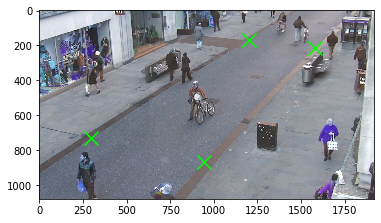

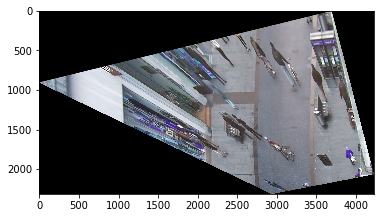

In [3]:
# Open input image
frame = cv2.imread(in_path)

# Compute video resolution and FPS
height, width, _ = frame.shape

# Compute homography matrix to generate bird's-eye view
M, bird_width, bird_height = bird_eye_transform(calibration_rect, width, height)

# Display calibration rectangle
plt.imshow(frame)
plt.scatter(calibration_rect[:, 0], calibration_rect[:, 1], marker="x", color=(0, 1, 0), s=200)
plt.show()

# Display bird's eye view
image_bird = cv2.warpPerspective(frame, M, (bird_width, bird_height))

plt.imshow(image_bird)
plt.show()

# Process image #

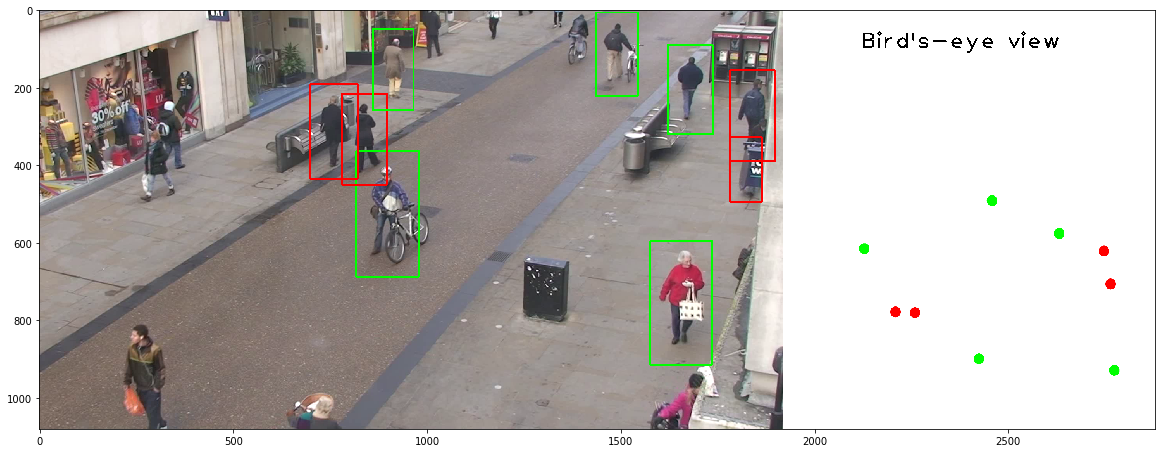

In [8]:
# Process frame
results = process_image(frame, M, scale, min_dist, width, height, bird_width, bird_height)

# Convert to RGB, since CV2 uses BGR
results = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)

# Display results
fig=plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()
